<a href="https://colab.research.google.com/github/Khushi-Allawadi/Code-Crew/blob/main/MinorProject_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TEXT ANALYSIS OF THE BHAGAVAT GITA

# Sentiment Analysis

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------------------------------------------


['startVerse\nDhritirashtra:\nRanged thus for battle on the sacred plain--\nOn Kurukshetra--say, Sanjaya!', 'say\nWhat wrought my people, and the Pandavas?', 'endVerse\n\nstartVerse\nSanjaya:\nWhen he beheld the host of Pandavas,\nRaja Duryodhana to Drona drew,\nAnd spake these words: \nendVerse\n\nstartVerse\n"Ah, Guru!', 'see this line,\nHow vast it is of Pandu fighting-men,\nEmbattled by the son of Drupada,\nThy scholar in the war!', "endVerse\n\nstartVerse\nTherein stand ranked\nChiefs like Arjuna, like to Bhima chiefs,\nBenders of bows; Virata, Yuyudhan,\nDrupada, eminent upon his car,\nDhrishtaket, Chekitan, Kasi's stout lord,\nPurujit, Kuntibhoj, and Saivya,\nWith Yudhamanyu, and Uttamauj\nSubhadra's child; and Drupadi's;\nendVerse\n\nstartVerse\n-all famed!", 'All mounted on their shining chariots!', 'On our side, too,--thou best of Brahmans!', 'see\nExcellent chiefs, commanders of my line,\nWhose names I joy to count:\nendVers

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Printing the original dataset after LEMMATIZATION:
['startverse', 'dhritirashtra', 'ranged', 'thus', 'battle', 'sacred', 'plain', 'kurukshetra', 'say', 'sanjaya', 'say', 'wrought', 'people', 'pandavas', 'endverse', 'startverse', 'sanjaya', 'beheld', 'host', 'pandavas', 'raja', 'duryodhana', 'drona', 'drew', 'spake', 'word', 'endverse', 'startverse', 'ah', 'guru', 'see', 'line', 'vast', 'pandu', 'fighting', 'men', 'embattled', 'son', 'drupada', 'thy', 'scholar', 'war', 'endverse', 'startverse', 'therein', 'stand', 'ranked', 'chief', 'like', 'arjuna', 'like', 'bhima', 'chief', 'bender', 'bow', 'virata', 'yuyudhan', 'drupada', 'eminent', 'upon', 'car', 'dhrishtaket', 'chekitan', 'kasi', 'stout', 'lord', 'purujit', 'kuntibhoj', 'saivya', 'yudhamanyu', 'uttamauj', 'subhadra', 'child', 'drupadi', 'endverse', 'startverse', 'famed', 'mounted', 'shining', 'chariot', 'side', 'thou', 'best', 'brahman', 'see', 'excellent', 'chief', 'commander', 'line', 'whose', 'name', 'joy', 'count', 'endverse', 

<ipython-input-5-50eaaf03eda0>:175: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')


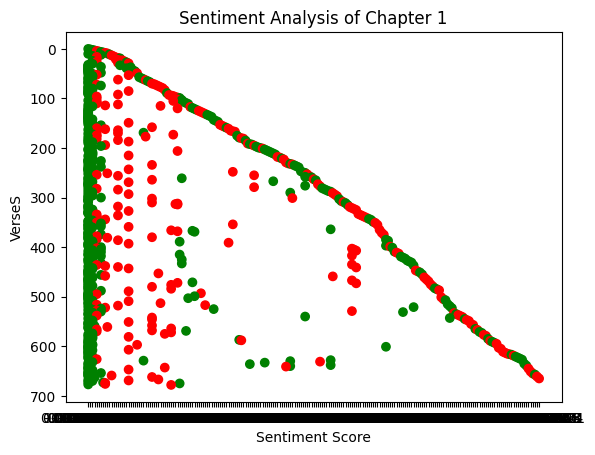

In [ ]:
# FOR CHAPTER 1 VERSES
# STEP 1 : DATA GATHERING.
input_data = "/content/GitaFinalDataset.txt"
with open(input_data, "r", encoding="utf-8") as file:
    text = file.read()

# STEP 2 : DATA CLEANING.
import nltk
nltk.download('averaged_perceptron_tagger')

# tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
print("------------------------------------------------\n\n")
print(sent_tokenize(text))
print("------------------------------------------------\n\n")
print(word_tokenize(text))
print("------------------------------------------------\n\n")

# lower case conversion
import re
text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
words = text.split()
print("The input dataset is split into words : ")
print(words)
print("------------------------------------------------\n\n")

#stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Here, we print all the stopwords in the english langauage using the nltk corpus.")
stop_words = set(stopwords.words("english"))
print(stop_words) #retrieved all the stopwords present in the English language
print("------------------------------------------------\n\n")
words = [w for w in words if w not in stopwords.words('english')]
print("Our original dataset after removing the stopwords : ")
print(words)
print("------------------------------------------------\n\n")

#stemming
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
print("Printing the original dataset after reducing all the words to their root/stem (STEMMING):")
print(stemmed)
print("------------------------------------------------\n\n")

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print("Printing the original dataset after LEMMATIZATION:")
print(lemmed)
print("------------------------------------------------\n\n")

# POS tagging
tokenized = sent_tokenize(text)
for i in tokenized :
  wordsList = nltk.word_tokenize(i)
  wordsList = [w for w in wordsList if not w in stop_words]
  tagged = nltk.pos_tag(wordsList)
  print("Dataset after pos tagging is performed : ")
  print(tagged)
print("------------------------------------------------\n\n")

# STEP 3 : FEATURE EXTRACTION USING WORD2VEC
import nltk
import gensim

preprocesseddata = tagged
print("Final pre-processed dataset :\n{}".format(preprocesseddata)) ## the pre-processed dataset
print("------------------------------------------------\n\n")

# Create a Word2Vec model
model = gensim.models.Word2Vec(preprocesseddata, min_count=1, window=4, vector_size=100)

# Extract features for each word in the data
features = []
for verse in preprocesseddata:
    for word in verse:
        features.append(model.wv[word])

# Save the features to a file
with open('bhagavad_gita_features1.csv', 'w') as f:
    f.write('word,feature1,feature2,...,feature100\n')
    for word, feature in zip(preprocesseddata, features):
        # Extract the first element of the tuple (the word)
        word = word[0]
        # Convert the features list to a string of comma-separated values
        feature_string = ','.join([str(f) for f in feature])
        f.write(','.join([word] + [feature_string]) + '\n')

print("Output of performing feature extraction using Word2Vec: Word embeddings")
print("------------------------------------------------\n\n")

# STEP 4 : CONVERSION OF WORD EMBEDDINGS INTO SUITABLE FORMAT FOR INPUT INTO NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Load the word embeddings and labels
with open('bhagavad_gita_features1.csv', 'r') as f:
    features = []
    labels = []
    for line in f:
        line = line.strip().split(',')
        # Skip the first element (word)
        feature_vector = []
        for value in line[2:]:
            try:
                feature_vector.append(str(float(value)))  # Convert each value to a string before adding it to the feature vector
            except ValueError:
                feature_vector.append('0.0')

        # Convert the list of word embeddings into a single string using ' ' as the delimiter
        feature_string = ' '.join(feature_vector)
        features.append(feature_string)
        labels.append(line[-1])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Convert word embeddings to bag-of-words representation
# Wrap each feature vector in a list to match the expected input format of the CountVectorizer
features_train_bow = vectorizer.fit_transform(features_train)
features_test_bow = vectorizer.transform(features_test)

# STEP 5 : Opinion Classification using Naive Bayes
# Train and evaluate the Naive Bayes classifier using the bag-of-words representation
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_bow, labels_train)

# Checking the accuracy of the Naive Bayes classifier
from sklearn.metrics import accuracy_score
predictions = classifier.predict(features_test_bow)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

# Classify each verse as "negative", "positive", or "neutral"
for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    print(f"Verse: {verse}")
    print(f"Predicted sentiment: {prediction}")

# STEP 6 : VISUALIZING THE RESULTS OF SENTIMENT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the predicted sentiments and verse texts
verse_texts = []
predicted_sentiments = []

for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    verse_texts.append(verse)
    predicted_sentiments.append(prediction)

# Create a DataFrame
data = {'Verse': verse_texts, 'Predicted Sentiment': predicted_sentiments}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('bhagavad_gita_sentiments1.xlsx', index=False)
print("Predicted sentiments saved to 'bhagavad_gita_sentiments1.xlsx'")

colors = np.where(pd.to_numeric(df['Predicted Sentiment']) > 0, 'green', np.where(pd.to_numeric(df['Predicted Sentiment']) < 0, 'red', 'gray'))
fade = np.abs(pd.to_numeric(df['Predicted Sentiment']))

plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')
#plt.grid(True)
# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('VerseS')
plt.title('Sentiment Analysis of Chapter 1')

plt.show()



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------------------------------------------


['\ufeffSanjaya.', 'Him, filled with such compassion and such grief,\nWith eyes tear-dimmed, despondent, in stern words\nThe Driver, Madhusudan, thus addressed:\n\n\nKrishna.', 'How hath this weakness taken thee?', 'Whence springs\nThe inglorious trouble, shameful to the brave,\nBarring the path of virtue?', 'Nay, Arjun!', 'Forbid thyself to feebleness!', 'it mars\nThy warrior-name!', 'cast off the coward-fit!', 'Wake!', 'Be thyself!', 'Arise, Scourge of thy Foes!', 'Arjuna.', 'How can I, in the battle, shoot with shafts\nOn Bhishma, or on Drona-O thou Chief!--\nBoth worshipful, both honourable men?', "Better to live on beggar's bread\nWith those we love alive,\nThan taste their blood in rich feasts spread,\nAnd guiltily survive!", 'Ah!', 'were it worse-who knows?--to be\nVictor or vanquished here,\nWhen those confront us angrily\nWhose death leaves living drear?', "In pity lost, by doubtings tossed,\nMy thoughts-distracted-turn\nTo Th

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Output of performing feature extraction using Word2Vec: Word embeddings
------------------------------------------------


Accuracy: 0.6926406926406926
Verse: 0.0 0.0 0.0
Predicted sentiment: 0.0062455144
Verse: -0.006037877 0.0030120513 0.004478143 -0.008383015 0.008396149 0.009036762 -0.0034397428 -0.0071441815 -0.00925091 -0.0037262847 0.008798338 -0.0076172943 0.0012255657 -0.00017908464 -0.0051856134 -0.008828901 -0.00918191 -0.007511733 -0.0030864584 0.008194535 0.001364855 -0.002320444 0.00028457772 0.002915727 -0.0037155706 -0.0090908855 0.0023005758 0.0040213605 0.0054216157 0.004768247 -0.0018972941 -0.003150035 0.0045218216 -0.0036938533 0.008787689 0.0058620684 -0.008025936 -0.004158224 -0.0057818824 -0.00090165774 0.0027454882 0.0062778327 0.004505569 0.00059496565 0.007550338 -0.003407472 -0.0036579508 7.210037e-05 0.0064138006 0.007118141 0.00966419 0.008924008 -0.0071872813 0.0023543674 0.008816385 -0.00781755 0.0075006494 -0.009385495 -0.0039100745 -0.008140199 0.00229

<ipython-input-12-973b0b6ede41>:174: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')


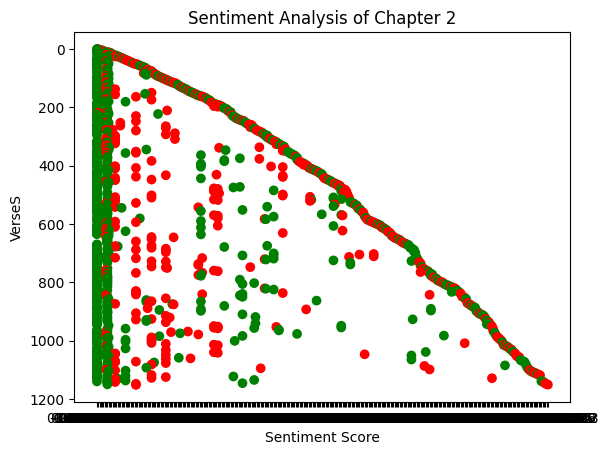

In [ ]:
# FOR CHAPTER 2 VERSES
# STEP 1 : DATA GATHERING.
input_data = "/content/gita_ch2.txt"
with open(input_data, "r", encoding="utf-8") as file:
    text = file.read()

# STEP 2 : DATA CLEANING.
import nltk
nltk.download('averaged_perceptron_tagger')

# tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
print("------------------------------------------------\n\n")
print(sent_tokenize(text))
print("------------------------------------------------\n\n")
print(word_tokenize(text))
print("------------------------------------------------\n\n")

# lower case conversion
import re
text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
words = text.split()
print("The input dataset is split into words : ")
print(words)
print("------------------------------------------------\n\n")

#stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Here, we print all the stopwords in the english langauage using the nltk corpus.")
stop_words = set(stopwords.words("english"))
print(stop_words) #retrieved all the stopwords present in the English language
print("------------------------------------------------\n\n")
words = [w for w in words if w not in stopwords.words('english')]
print("Our original dataset after removing the stopwords : ")
print(words)
print("------------------------------------------------\n\n")

#stemming
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
print("Printing the original dataset after reducing all the words to their root/stem (STEMMING):")
print(stemmed)
print("------------------------------------------------\n\n")

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print("Printing the original dataset after LEMMATIZATION:")
print(lemmed)
print("------------------------------------------------\n\n")

# POS tagging
tokenized = sent_tokenize(text)
for i in tokenized :
  wordsList = nltk.word_tokenize(i)
  wordsList = [w for w in wordsList if not w in stop_words]
  tagged = nltk.pos_tag(wordsList)
  print("Dataset after pos tagging is performed : ")
  print(tagged)
print("------------------------------------------------\n\n")

# STEP 3 : FEATURE EXTRACTION USING WORD2VEC
import nltk
import gensim

preprocesseddata = tagged
print("Final pre-processed dataset :\n{}".format(preprocesseddata)) ## the pre-processed dataset
print("------------------------------------------------\n\n")

# Create a Word2Vec model
model = gensim.models.Word2Vec(preprocesseddata, min_count=1, window=4, vector_size=100)

# Extract features for each word in the data
features = []
for verse in preprocesseddata:
    for word in verse:
        features.append(model.wv[word])

# Save the features to a file
with open('bhagavad_gita_features2.csv', 'w') as f:
    f.write('word,feature1,feature2,...,feature100\n')
    for word, feature in zip(preprocesseddata, features):
        # Extract the first element of the tuple (the word)
        word = word[0]
        # Convert the features list to a string of comma-separated values
        feature_string = ','.join([str(f) for f in feature])
        f.write(','.join([word] + [feature_string]) + '\n')

print("Output of performing feature extraction using Word2Vec: Word embeddings")
print("------------------------------------------------\n\n")

# STEP 4 : CONVERSION OF WORD EMBEDDINGS INTO SUITABLE FORMAT FOR INPUT INTO NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Load the word embeddings and labels
with open('bhagavad_gita_features2.csv', 'r') as f:
    features = []
    labels = []
    for line in f:
        line = line.strip().split(',')
        # Skip the first element (word)
        feature_vector = []
        for value in line[2:]:
            try:
                feature_vector.append(str(float(value)))  # Convert each value to a string before adding it to the feature vector
            except ValueError:
                feature_vector.append('0.0')

        # Convert the list of word embeddings into a single string using ' ' as the delimiter
        feature_string = ' '.join(feature_vector)
        features.append(feature_string)
        labels.append(line[-1])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Convert word embeddings to bag-of-words representation
# Wrap each feature vector in a list to match the expected input format of the CountVectorizer
features_train_bow = vectorizer.fit_transform(features_train)
features_test_bow = vectorizer.transform(features_test)

# STEP 5 : Opinion Classification using Naive Bayes
# Train and evaluate the Naive Bayes classifier using the bag-of-words representation
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_bow, labels_train)

# Checking the accuracy of the Naive Bayes classifier
from sklearn.metrics import accuracy_score
predictions = classifier.predict(features_test_bow)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

# Classify each verse as "negative", "positive", or "neutral"
for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    print(f"Verse: {verse}")
    print(f"Predicted sentiment: {prediction}")

# STEP 6 : VISUALIZING THE RESULTS OF SENTIMENT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the predicted sentiments and verse texts
verse_texts = []
predicted_sentiments = []

for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    verse_texts.append(verse)
    predicted_sentiments.append(prediction)

# Create a DataFrame
data = {'Verse': verse_texts, 'Predicted Sentiment': predicted_sentiments}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('bhagavad_gita_sentiments2.xlsx', index=False)
print("Predicted sentiments saved to 'bhagavad_gita_sentiments2.xlsx'")

colors = np.where(pd.to_numeric(df['Predicted Sentiment']) > 0, 'green', np.where(pd.to_numeric(df['Predicted Sentiment']) < 0, 'red', 'gray'))
fade = np.abs(pd.to_numeric(df['Predicted Sentiment']))

plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')
#plt.grid(True)
# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('VerseS')
plt.title('Sentiment Analysis of Chapter 2')

plt.show()



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------------------------------------------


['\ufeffArjuna.', 'Thou whom all mortals praise, Janardana!', 'If meditation be a nobler thing\nThan action, wherefore, then, great Kesava!', 'Dost thou impel me to this dreadful fight?', 'Now am I by thy doubtful speech disturbed!', 'Tell me one thing, and tell me certainly;\nBy what road shall I find the better end?', 'Krishna.', 'I told thee, blameless Lord!', 'there be two paths\nShown to this world; two schools of wisdom.', "First\nThe Sankhya's, which doth save in way of works\nPrescribed[FN#4] by reason; next, the Yog, which bids\nAttain by meditation, spiritually:\nYet these are one!", "No man shall 'scape from act\nBy shunning action; nay, and none shall come\nBy mere renouncements unto perfectness.", "Nay, and no jot of time, at any time,\nRests any actionless; his nature's law\nCompels him, even unwilling, into act;\n[For thought is act in fancy].", 'He who sits\nSuppressing all the instruments of flesh,\nYet in his idle hea

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset after pos tagging is performed : 
[('arjuna', 'NN'), ('thou', 'NN'), ('mortals', 'NNS'), ('praise', 'VBP'), ('janardana', 'JJ'), ('meditation', 'NN'), ('nobler', 'IN'), ('thing', 'NN'), ('action', 'NN'), ('wherefore', 'RB'), ('great', 'JJ'), ('kesava', 'NN'), ('dost', 'NN'), ('thou', 'NN'), ('impel', 'NN'), ('dreadful', 'JJ'), ('fight', 'NN'), ('thy', 'NN'), ('doubtful', 'JJ'), ('speech', 'NN'), ('disturbed', 'VBD'), ('tell', 'VB'), ('one', 'CD'), ('thing', 'NN'), ('tell', 'NN'), ('certainly', 'RB'), ('road', 'NN'), ('shall', 'MD'), ('find', 'VB'), ('better', 'JJ'), ('end', 'NN'), ('krishna', 'NN'), ('told', 'VBD'), ('thee', 'JJ'), ('blameless', 'NN'), ('lord', 'NN'), ('two', 'CD'), ('paths', 'NNS'), ('shown', 'VBN'), ('world', 'NN'), ('two', 'CD'), ('schools', 'NNS'), ('wisdom', 'VBP'), ('first', 'RB'), ('sankhya', 'JJ'), ('doth', 'NNS'), ('save', 'VBP'), ('way', 'NN'), ('works', 'NNS'), ('prescribed', 'VBD'), ('fn', 'JJ'), ('4', 'CD'), ('reason', 'NN'), ('next', 'JJ'), ('yog'

<ipython-input-14-7f8fba7064a4>:174: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')


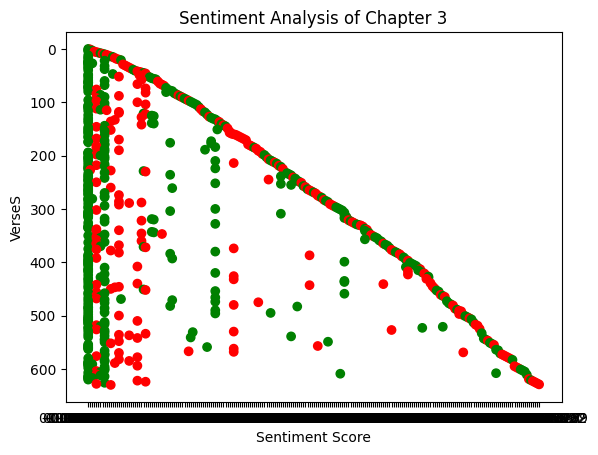

In [ ]:
# FOR CHAPTER 3 VERSES
# STEP 1 : DATA GATHERING.
input_data = "/content/gita_ch3.txt"
with open(input_data, "r", encoding="utf-8") as file:
    text = file.read()

# STEP 2 : DATA CLEANING.
import nltk
nltk.download('averaged_perceptron_tagger')

# tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
print("------------------------------------------------\n\n")
print(sent_tokenize(text))
print("------------------------------------------------\n\n")
print(word_tokenize(text))
print("------------------------------------------------\n\n")

# lower case conversion
import re
text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
words = text.split()
print("The input dataset is split into words : ")
print(words)
print("------------------------------------------------\n\n")

#stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Here, we print all the stopwords in the english langauage using the nltk corpus.")
stop_words = set(stopwords.words("english"))
print(stop_words) #retrieved all the stopwords present in the English language
print("------------------------------------------------\n\n")
words = [w for w in words if w not in stopwords.words('english')]
print("Our original dataset after removing the stopwords : ")
print(words)
print("------------------------------------------------\n\n")

#stemming
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
print("Printing the original dataset after reducing all the words to their root/stem (STEMMING):")
print(stemmed)
print("------------------------------------------------\n\n")

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print("Printing the original dataset after LEMMATIZATION:")
print(lemmed)
print("------------------------------------------------\n\n")

# POS tagging
tokenized = sent_tokenize(text)
for i in tokenized :
  wordsList = nltk.word_tokenize(i)
  wordsList = [w for w in wordsList if not w in stop_words]
  tagged = nltk.pos_tag(wordsList)
  print("Dataset after pos tagging is performed : ")
  print(tagged)
print("------------------------------------------------\n\n")

# STEP 3 : FEATURE EXTRACTION USING WORD2VEC
import nltk
import gensim

preprocesseddata = tagged
print("Final pre-processed dataset :\n{}".format(preprocesseddata)) ## the pre-processed dataset
print("------------------------------------------------\n\n")

# Create a Word2Vec model
model = gensim.models.Word2Vec(preprocesseddata, min_count=1, window=4, vector_size=100)

# Extract features for each word in the data
features = []
for verse in preprocesseddata:
    for word in verse:
        features.append(model.wv[word])

# Save the features to a file
with open('bhagavad_gita_features3.csv', 'w') as f:
    f.write('word,feature1,feature2,...,feature100\n')
    for word, feature in zip(preprocesseddata, features):
        # Extract the first element of the tuple (the word)
        word = word[0]
        # Convert the features list to a string of comma-separated values
        feature_string = ','.join([str(f) for f in feature])
        f.write(','.join([word] + [feature_string]) + '\n')

print("Output of performing feature extraction using Word2Vec: Word embeddings")
print("------------------------------------------------\n\n")

# STEP 4 : CONVERSION OF WORD EMBEDDINGS INTO SUITABLE FORMAT FOR INPUT INTO NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Load the word embeddings and labels
with open('bhagavad_gita_features3.csv', 'r') as f:
    features = []
    labels = []
    for line in f:
        line = line.strip().split(',')
        # Skip the first element (word)
        feature_vector = []
        for value in line[2:]:
            try:
                feature_vector.append(str(float(value)))  # Convert each value to a string before adding it to the feature vector
            except ValueError:
                feature_vector.append('0.0')

        # Convert the list of word embeddings into a single string using ' ' as the delimiter
        feature_string = ' '.join(feature_vector)
        features.append(feature_string)
        labels.append(line[-1])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Convert word embeddings to bag-of-words representation
# Wrap each feature vector in a list to match the expected input format of the CountVectorizer
features_train_bow = vectorizer.fit_transform(features_train)
features_test_bow = vectorizer.transform(features_test)

# STEP 5 : Opinion Classification using Naive Bayes
# Train and evaluate the Naive Bayes classifier using the bag-of-words representation
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_bow, labels_train)

# Checking the accuracy of the Naive Bayes classifier
from sklearn.metrics import accuracy_score
predictions = classifier.predict(features_test_bow)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

# Classify each verse as "negative", "positive", or "neutral"
for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    print(f"Verse: {verse}")
    print(f"Predicted sentiment: {prediction}")

# STEP 6 : VISUALIZING THE RESULTS OF SENTIMENT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the predicted sentiments and verse texts
verse_texts = []
predicted_sentiments = []

for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    verse_texts.append(verse)
    predicted_sentiments.append(prediction)

# Create a DataFrame
data = {'Verse': verse_texts, 'Predicted Sentiment': predicted_sentiments}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('bhagavad_gita_sentiments3.xlsx', index=False)
print("Predicted sentiments saved to 'bhagavad_gita_sentiments3.xlsx'")

colors = np.where(pd.to_numeric(df['Predicted Sentiment']) > 0, 'green', np.where(pd.to_numeric(df['Predicted Sentiment']) < 0, 'red', 'gray'))
fade = np.abs(pd.to_numeric(df['Predicted Sentiment']))

plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')
#plt.grid(True)
# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('VerseS')
plt.title('Sentiment Analysis of Chapter 3')

plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------------------------------------------


['\ufeffKrishna.', 'This deathless Yoga, this deep union,\nI taught Vivaswata,[FN#6] the Lord of Light;\nVivaswata to Manu gave it; he\nTo Ikshwaku; so passed it down the line\nOf all my royal Rishis.', 'Then, with years,\nThe truth grew dim and perished, noble Prince!', 'Now once again to thee it is declared--\nThis ancient lore, this mystery supreme--\nSeeing I find thee votary and friend.', 'Arjuna.', "Thy birth, dear Lord, was in these later days,\nAnd bright Vivaswata's preceded time!", 'How shall I comprehend this thing thou sayest,\n"From the beginning it was I who taught?"', 'Krishna.', 'Manifold the renewals of my birth\nHave been, Arjuna!', 'and of thy births, too!', 'But mine I know, and thine thou knowest not,\nO Slayer of thy Foes!', 'Albeit I be\nUnborn, undying, indestructible,\nThe Lord of all things living; not the less--\nBy Maya, by my magic which I stamp\nOn floating Nature-forms, the primal vast--\nI come, and go, 

<ipython-input-15-2adf716c0b07>:174: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')


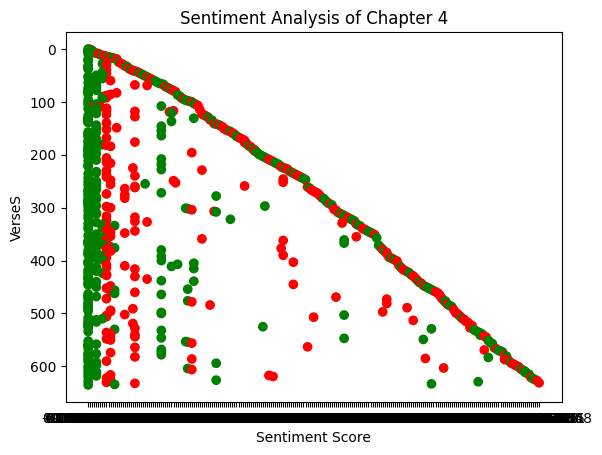

In [ ]:
# FOR CHAPTER 4 VERSES
# STEP 1 : DATA GATHERING.
input_data = "/content/gita_ch4.txt"
with open(input_data, "r", encoding="utf-8") as file:
    text = file.read()

# STEP 2 : DATA CLEANING.
import nltk
nltk.download('averaged_perceptron_tagger')

# tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
print("------------------------------------------------\n\n")
print(sent_tokenize(text))
print("------------------------------------------------\n\n")
print(word_tokenize(text))
print("------------------------------------------------\n\n")

# lower case conversion
import re
text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
words = text.split()
print("The input dataset is split into words : ")
print(words)
print("------------------------------------------------\n\n")

#stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Here, we print all the stopwords in the english langauage using the nltk corpus.")
stop_words = set(stopwords.words("english"))
print(stop_words) #retrieved all the stopwords present in the English language
print("------------------------------------------------\n\n")
words = [w for w in words if w not in stopwords.words('english')]
print("Our original dataset after removing the stopwords : ")
print(words)
print("------------------------------------------------\n\n")

#stemming
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
print("Printing the original dataset after reducing all the words to their root/stem (STEMMING):")
print(stemmed)
print("------------------------------------------------\n\n")

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print("Printing the original dataset after LEMMATIZATION:")
print(lemmed)
print("------------------------------------------------\n\n")

# POS tagging
tokenized = sent_tokenize(text)
for i in tokenized :
  wordsList = nltk.word_tokenize(i)
  wordsList = [w for w in wordsList if not w in stop_words]
  tagged = nltk.pos_tag(wordsList)
  print("Dataset after pos tagging is performed : ")
  print(tagged)
print("------------------------------------------------\n\n")

# STEP 3 : FEATURE EXTRACTION USING WORD2VEC
import nltk
import gensim

preprocesseddata = tagged
print("Final pre-processed dataset :\n{}".format(preprocesseddata)) ## the pre-processed dataset
print("------------------------------------------------\n\n")

# Create a Word2Vec model
model = gensim.models.Word2Vec(preprocesseddata, min_count=1, window=4, vector_size=100)

# Extract features for each word in the data
features = []
for verse in preprocesseddata:
    for word in verse:
        features.append(model.wv[word])

# Save the features to a file
with open('bhagavad_gita_features4.csv', 'w') as f:
    f.write('word,feature1,feature2,...,feature100\n')
    for word, feature in zip(preprocesseddata, features):
        # Extract the first element of the tuple (the word)
        word = word[0]
        # Convert the features list to a string of comma-separated values
        feature_string = ','.join([str(f) for f in feature])
        f.write(','.join([word] + [feature_string]) + '\n')

print("Output of performing feature extraction using Word2Vec: Word embeddings")
print("------------------------------------------------\n\n")

# STEP 4 : CONVERSION OF WORD EMBEDDINGS INTO SUITABLE FORMAT FOR INPUT INTO NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Load the word embeddings and labels
with open('bhagavad_gita_features4.csv', 'r') as f:
    features = []
    labels = []
    for line in f:
        line = line.strip().split(',')
        # Skip the first element (word)
        feature_vector = []
        for value in line[2:]:
            try:
                feature_vector.append(str(float(value)))  # Convert each value to a string before adding it to the feature vector
            except ValueError:
                feature_vector.append('0.0')

        # Convert the list of word embeddings into a single string using ' ' as the delimiter
        feature_string = ' '.join(feature_vector)
        features.append(feature_string)
        labels.append(line[-1])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Convert word embeddings to bag-of-words representation
# Wrap each feature vector in a list to match the expected input format of the CountVectorizer
features_train_bow = vectorizer.fit_transform(features_train)
features_test_bow = vectorizer.transform(features_test)

# STEP 5 : Opinion Classification using Naive Bayes
# Train and evaluate the Naive Bayes classifier using the bag-of-words representation
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_bow, labels_train)

# Checking the accuracy of the Naive Bayes classifier
from sklearn.metrics import accuracy_score
predictions = classifier.predict(features_test_bow)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

# Classify each verse as "negative", "positive", or "neutral"
for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    print(f"Verse: {verse}")
    print(f"Predicted sentiment: {prediction}")

# STEP 6 : VISUALIZING THE RESULTS OF SENTIMENT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the predicted sentiments and verse texts
verse_texts = []
predicted_sentiments = []

for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    verse_texts.append(verse)
    predicted_sentiments.append(prediction)

# Create a DataFrame
data = {'Verse': verse_texts, 'Predicted Sentiment': predicted_sentiments}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('bhagavad_gita_sentiments4.xlsx', index=False)
print("Predicted sentiments saved to 'bhagavad_gita_sentiments4.xlsx'")

colors = np.where(pd.to_numeric(df['Predicted Sentiment']) > 0, 'green', np.where(pd.to_numeric(df['Predicted Sentiment']) < 0, 'red', 'gray'))
fade = np.abs(pd.to_numeric(df['Predicted Sentiment']))

plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')
#plt.grid(True)
# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('VerseS')
plt.title('Sentiment Analysis of Chapter 4')

plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------------------------------------------


['\ufeffArjuna.', 'Yet, Krishna!', 'at the one time thou dost laud\nSurcease of works, and, at another time,\nService through work.', 'Of these twain plainly tell\nWhich is the better way?', 'Krishna.', 'To cease from works\nIs well, and to do works in holiness\nIs well; and both conduct to bliss supreme;\nBut of these twain the better way is his\nWho working piously refraineth not.', 'That is the true Renouncer, firm and fixed,\nWho--seeking nought, rejecting nought--dwells proof\nAgainst the "opposites.', '"[FN#8] O valiant Prince!', "In doing, such breaks lightly from all deed:\n'Tis the new scholar talks as they were two,\nThis Sankhya and this Yoga: wise men know\nWho husbands one plucks golden fruit of both!", 'The region of high rest which Sankhyans reach\nYogins attain.', 'Who sees these twain as one\nSees with clear eyes!', 'Yet such abstraction, Chief!', 'Is hard to win without much holiness.', 'Whoso is fixed in holiness, se

<ipython-input-16-ee4f2c037d05>:174: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')


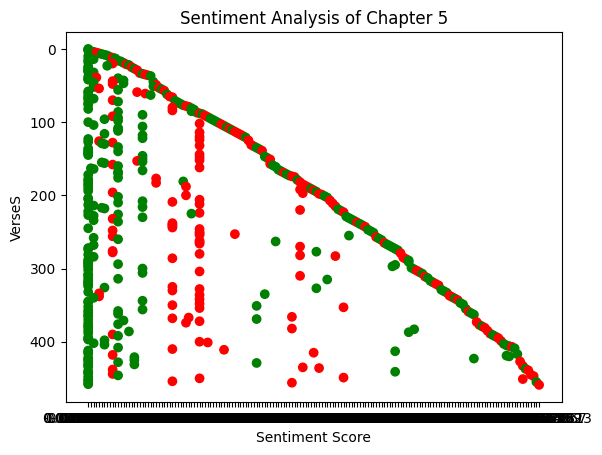

In [ ]:
# FOR CHAPTER 5 VERSES
# STEP 1 : DATA GATHERING.
input_data = "/content/gita_ch5.txt"
with open(input_data, "r", encoding="utf-8") as file:
    text = file.read()

# STEP 2 : DATA CLEANING.
import nltk
nltk.download('averaged_perceptron_tagger')

# tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
print("------------------------------------------------\n\n")
print(sent_tokenize(text))
print("------------------------------------------------\n\n")
print(word_tokenize(text))
print("------------------------------------------------\n\n")

# lower case conversion
import re
text = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
words = text.split()
print("The input dataset is split into words : ")
print(words)
print("------------------------------------------------\n\n")

#stop words removal
from nltk.corpus import stopwords
nltk.download('stopwords')
print("Here, we print all the stopwords in the english langauage using the nltk corpus.")
stop_words = set(stopwords.words("english"))
print(stop_words) #retrieved all the stopwords present in the English language
print("------------------------------------------------\n\n")
words = [w for w in words if w not in stopwords.words('english')]
print("Our original dataset after removing the stopwords : ")
print(words)
print("------------------------------------------------\n\n")

#stemming
from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
print("Printing the original dataset after reducing all the words to their root/stem (STEMMING):")
print(stemmed)
print("------------------------------------------------\n\n")

#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print("Printing the original dataset after LEMMATIZATION:")
print(lemmed)
print("------------------------------------------------\n\n")

# POS tagging
tokenized = sent_tokenize(text)
for i in tokenized :
  wordsList = nltk.word_tokenize(i)
  wordsList = [w for w in wordsList if not w in stop_words]
  tagged = nltk.pos_tag(wordsList)
  print("Dataset after pos tagging is performed : ")
  print(tagged)
print("------------------------------------------------\n\n")

# STEP 3 : FEATURE EXTRACTION USING WORD2VEC
import nltk
import gensim

preprocesseddata = tagged
print("Final pre-processed dataset :\n{}".format(preprocesseddata)) ## the pre-processed dataset
print("------------------------------------------------\n\n")

# Create a Word2Vec model
model = gensim.models.Word2Vec(preprocesseddata, min_count=1, window=4, vector_size=100)

# Extract features for each word in the data
features = []
for verse in preprocesseddata:
    for word in verse:
        features.append(model.wv[word])

# Save the features to a file
with open('bhagavad_gita_features5.csv', 'w') as f:
    f.write('word,feature1,feature2,...,feature100\n')
    for word, feature in zip(preprocesseddata, features):
        # Extract the first element of the tuple (the word)
        word = word[0]
        # Convert the features list to a string of comma-separated values
        feature_string = ','.join([str(f) for f in feature])
        f.write(','.join([word] + [feature_string]) + '\n')

print("Output of performing feature extraction using Word2Vec: Word embeddings")
print("------------------------------------------------\n\n")

# STEP 4 : CONVERSION OF WORD EMBEDDINGS INTO SUITABLE FORMAT FOR INPUT INTO NAIVE BAYES CLASSIFIER
from sklearn.feature_extraction.text import CountVectorizer
import gensim

# Load the word embeddings and labels
with open('bhagavad_gita_features5.csv', 'r') as f:
    features = []
    labels = []
    for line in f:
        line = line.strip().split(',')
        # Skip the first element (word)
        feature_vector = []
        for value in line[2:]:
            try:
                feature_vector.append(str(float(value)))  # Convert each value to a string before adding it to the feature vector
            except ValueError:
                feature_vector.append('0.0')

        # Convert the list of word embeddings into a single string using ' ' as the delimiter
        feature_string = ' '.join(feature_vector)
        features.append(feature_string)
        labels.append(line[-1])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Convert word embeddings to bag-of-words representation
# Wrap each feature vector in a list to match the expected input format of the CountVectorizer
features_train_bow = vectorizer.fit_transform(features_train)
features_test_bow = vectorizer.transform(features_test)

# STEP 5 : Opinion Classification using Naive Bayes
# Train and evaluate the Naive Bayes classifier using the bag-of-words representation
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(features_train_bow, labels_train)

# Checking the accuracy of the Naive Bayes classifier
from sklearn.metrics import accuracy_score
predictions = classifier.predict(features_test_bow)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)

# Classify each verse as "negative", "positive", or "neutral"
for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    print(f"Verse: {verse}")
    print(f"Predicted sentiment: {prediction}")

# STEP 6 : VISUALIZING THE RESULTS OF SENTIMENT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the predicted sentiments and verse texts
verse_texts = []
predicted_sentiments = []

for verse, label in zip(features, labels):
    prediction = classifier.predict(vectorizer.transform([verse]))[0]
    verse_texts.append(verse)
    predicted_sentiments.append(prediction)

# Create a DataFrame
data = {'Verse': verse_texts, 'Predicted Sentiment': predicted_sentiments}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('bhagavad_gita_sentiments5.xlsx', index=False)
print("Predicted sentiments saved to 'bhagavad_gita_sentiments5.xlsx'")

colors = np.where(pd.to_numeric(df['Predicted Sentiment']) > 0, 'green', np.where(pd.to_numeric(df['Predicted Sentiment']) < 0, 'red', 'gray'))
fade = np.abs(pd.to_numeric(df['Predicted Sentiment']))

plt.scatter(df['Predicted Sentiment'], range(len(df)), c=colors, cmap='cool')
#plt.grid(True)
# Invert the y-axis
plt.gca().invert_yaxis()

# Set the axis labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('VerseS')
plt.title('Sentiment Analysis of Chapter 5')

plt.show()